In [1]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import nltk
from nltk.stem.snowball import SnowballStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
import spacy
import tqdm as notebook_tqdm
nlp = spacy.load("en_core_web_sm")
import googletrans
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#IPU144 lang:en since:2021-01-01 until:2022-10-01').get_items()):
        tweets_list2.append([tweet.content])

In [3]:
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Tweets'])

# Display first 5 entries from dataframe
tweets_df2.head()

,Tweets
0,make a difference @opensea @lapatina_ @MVS_UA ...
1,You Can Make A Difference @opensea #blender #S...
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü..."
3,The #climatecrisis is affecting every region o...
4,The Nusa Dua Declaration is a global call for ...


In [4]:
def remove(text):
   text = ' ' .join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
   return text
tweets_df2['remove_http'] = tweets_df2['Tweets'].apply(lambda x: remove(x))
tweets_df2.head()

,Tweets,remove_http
0,make a difference @opensea @lapatina_ @MVS_UA ...,make a difference UA help daily Ukraine aslund...
1,You Can Make A Difference @opensea #blender #S...,You Can Make A Difference blender SupportUkrai...
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü...",In 1 9 2 2 the IPU welcomed Antonie Pf lf an M...
3,The #climatecrisis is affecting every region o...,The climatecrisis is affecting every region of...
4,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...


In [5]:
def remov(tweet):
   tweet = re.sub(r'\$\w*', '', tweet)
   tweet = re.sub(r'^RT[\s]+', '', tweet)
   tweet = re.sub(r'#', '', tweet)
   tweet = re.sub('[0-9]+', '', tweet)
   tweet = re.sub('@[A-Za-z0-9_]+', '', tweet) #removes @mentions
   return tweet
tweets_df2['remove_hashtag'] = tweets_df2['remove_http'].apply(lambda x: remov(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag
0,make a difference @opensea @lapatina_ @MVS_UA ...,make a difference UA help daily Ukraine aslund...,make a difference UA help daily Ukraine aslund...
1,You Can Make A Difference @opensea #blender #S...,You Can Make A Difference blender SupportUkrai...,You Can Make A Difference blender SupportUkrai...
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü...",In 1 9 2 2 the IPU welcomed Antonie Pf lf an M...,In the IPU welcomed Antonie Pf lf an MP fr...
3,The #climatecrisis is affecting every region o...,The climatecrisis is affecting every region of...,The climatecrisis is affecting every region of...
4,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...


In [6]:
tweets_df2.drop_duplicates(subset="remove_hashtag", keep="first", inplace=True)
tweets_df2.head()

,Tweets,remove_http,remove_hashtag
0,make a difference @opensea @lapatina_ @MVS_UA ...,make a difference UA help daily Ukraine aslund...,make a difference UA help daily Ukraine aslund...
1,You Can Make A Difference @opensea #blender #S...,You Can Make A Difference blender SupportUkrai...,You Can Make A Difference blender SupportUkrai...
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü...",In 1 9 2 2 the IPU welcomed Antonie Pf lf an M...,In the IPU welcomed Antonie Pf lf an MP fr...
3,The #climatecrisis is affecting every region o...,The climatecrisis is affecting every region of...,The climatecrisis is affecting every region of...
4,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...


In [7]:
tweets_df2.shape

(831, 3)

In [12]:
#import NLTK and sastrawi

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiyeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
stop_factory = set(stopwords.words('english'))
data = stop_factory
print(data)

{'over', 'on', 'any', 'whom', 'do', 'shan', "you're", 'her', 'against', 'once', 'out', 'been', 'of', 'but', 'having', 'an', 'hasn', 'can', "mightn't", 'such', 'doing', 'we', 'will', 'where', 'very', 'ain', 'down', 'his', 'why', 'wouldn', "it's", 'll', 's', "haven't", 'itself', 'was', 'is', 'more', "weren't", 'wasn', 'when', 'theirs', 'ma', 'be', 'yourselves', 'again', 'these', 'each', 'few', 'hers', 'there', 'had', 'in', "don't", "didn't", 'above', 'were', 'into', 'for', 'him', 'from', 'other', 'didn', 'ours', 'up', 'and', 'my', 'here', 'than', 'own', "mustn't", 'haven', 'nor', 'shouldn', 'you', 'i', 'am', 'she', "you've", 'them', 'not', 'doesn', 'the', 'to', 'or', 'mightn', 've', 'he', 'now', 'through', "shan't", 'before', 'has', 'while', 'so', 'some', 'our', 'below', 'yourself', 'does', 'himself', 'isn', 're', 'weren', 'only', 'off', 'its', 'herself', 'm', "aren't", 'that', 'myself', 'are', 'your', "she's", 'then', 'y', 'same', 'couldn', 'which', 'ourselves', 'all', 'what', 'this', '

In [35]:
stemmer = SnowballStemmer(language='english')
import string
from nltk.tokenize import TweetTokenizer
happy_emoticons = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':x', ':>', '=]', '8)',
    ':-D', ':D', ':^)', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D',
    '=D', '=-3', ':-))', ':-)', "-')", ':*', ':^*', '>:P', ':-P', ':P',
    'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)',
    '>:-)', '<3'
])
sad_emoticons = set([
    ':L', ':-/', '>:/', ':$', '>:[', ':@', ':-(', ':[', ':-||', '=L',
    ':<', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'(", ':\\', ':-c',
    ':c', ':(', '>:\\', ':('
])
all_emoticons = happy_emoticons.union(sad_emoticons)
def clean_tweets(tweet):
   tokenizer = TweetTokenizer(preserve_case=False,  
                             strip_handles=True,
                             reduce_len=True)
   tweet_tokens = tokenizer.tokenize(tweet)
   tweet_clean = []
   for word in tweet_tokens:
      if(word not in data and
         word not in all_emoticons and
         word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweet_clean.append(stem_word)
  
   return tweet_clean

In [36]:
tweets_df2['Tweet'] = tweets_df2['remove_hashtag'].apply(lambda x: clean_tweets(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,make a difference @opensea @lapatina_ @MVS_UA ...,make a difference UA help daily Ukraine aslund...,make a difference UA help daily Ukraine aslund...,"[make, differ, ua, help, daili, ukrain, aslund..."
1,You Can Make A Difference @opensea #blender #S...,You Can Make A Difference blender SupportUkrai...,You Can Make A Difference blender SupportUkrai...,"[make, differ, blender, supportukrain, eu, sta..."
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü...",In 1 9 2 2 the IPU welcomed Antonie Pf lf an M...,In the IPU welcomed Antonie Pf lf an MP fr...,"[ipu, welcom, antoni, pf, lf, mp, germani, spe..."
3,The #climatecrisis is affecting every region o...,The climatecrisis is affecting every region of...,The climatecrisis is affecting every region of...,"[climatecrisi, affect, everi, region, world, p..."
4,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,"[nusa, dua, declar, global, call, immedi, incl..."


In [37]:
def remove_punct(text):
   text = " ".join([char for char in text if char not in string.punctuation])
   return text

In [38]:
tweets_df2['Tweet'] = tweets_df2['Tweet'].apply(lambda x: remove_punct(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,make a difference @opensea @lapatina_ @MVS_UA ...,make a difference UA help daily Ukraine aslund...,make a difference UA help daily Ukraine aslund...,make differ ua help daili ukrain aslund rudenk...
1,You Can Make A Difference @opensea #blender #S...,You Can Make A Difference blender SupportUkrai...,You Can Make A Difference blender SupportUkrai...,make differ blender supportukrain eu standwith...
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü...",In 1 9 2 2 the IPU welcomed Antonie Pf lf an M...,In the IPU welcomed Antonie Pf lf an MP fr...,ipu welcom antoni pf lf mp germani speak first...
3,The #climatecrisis is affecting every region o...,The climatecrisis is affecting every region of...,The climatecrisis is affecting every region of...,climatecrisi affect everi region world particu...
4,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,nusa dua declar global call immedi inclus acti...


In [39]:
tweets_df2 = tweets_df2[tweets_df2['Tweet'] != '']
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,make a difference @opensea @lapatina_ @MVS_UA ...,make a difference UA help daily Ukraine aslund...,make a difference UA help daily Ukraine aslund...,make differ ua help daili ukrain aslund rudenk...
1,You Can Make A Difference @opensea #blender #S...,You Can Make A Difference blender SupportUkrai...,You Can Make A Difference blender SupportUkrai...,make differ blender supportukrain eu standwith...
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü...",In 1 9 2 2 the IPU welcomed Antonie Pf lf an M...,In the IPU welcomed Antonie Pf lf an MP fr...,ipu welcom antoni pf lf mp germani speak first...
3,The #climatecrisis is affecting every region o...,The climatecrisis is affecting every region of...,The climatecrisis is affecting every region of...,climatecrisi affect everi region world particu...
4,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,nusa dua declar global call immedi inclus acti...


In [40]:
tweets_df2 = tweets_df2.reset_index(drop=True)
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,make a difference @opensea @lapatina_ @MVS_UA ...,make a difference UA help daily Ukraine aslund...,make a difference UA help daily Ukraine aslund...,make differ ua help daili ukrain aslund rudenk...
1,You Can Make A Difference @opensea #blender #S...,You Can Make A Difference blender SupportUkrai...,You Can Make A Difference blender SupportUkrai...,make differ blender supportukrain eu standwith...
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü...",In 1 9 2 2 the IPU welcomed Antonie Pf lf an M...,In the IPU welcomed Antonie Pf lf an MP fr...,ipu welcom antoni pf lf mp germani speak first...
3,The #climatecrisis is affecting every region o...,The climatecrisis is affecting every region of...,The climatecrisis is affecting every region of...,climatecrisi affect everi region world particu...
4,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,nusa dua declar global call immedi inclus acti...


In [41]:
tweets_df2.drop_duplicates(subset="remove_hashtag", keep="first", inplace=True)
tweets_df2.head(10)

,Tweets,remove_http,remove_hashtag,Tweet
0,make a difference @opensea @lapatina_ @MVS_UA ...,make a difference UA help daily Ukraine aslund...,make a difference UA help daily Ukraine aslund...,make differ ua help daili ukrain aslund rudenk...
1,You Can Make A Difference @opensea #blender #S...,You Can Make A Difference blender SupportUkrai...,You Can Make A Difference blender SupportUkrai...,make differ blender supportukrain eu standwith...
2,"In 1️⃣9️⃣2️⃣2️⃣, the #IPU welcomed Antonie Pfü...",In 1 9 2 2 the IPU welcomed Antonie Pf lf an M...,In the IPU welcomed Antonie Pf lf an MP fr...,ipu welcom antoni pf lf mp germani speak first...
3,The #climatecrisis is affecting every region o...,The climatecrisis is affecting every region of...,The climatecrisis is affecting every region of...,climatecrisi affect everi region world particu...
4,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,The Nusa Dua Declaration is a global call for ...,nusa dua declar global call immedi inclus acti...
5,"During #IPU144, #MPs spoke of commitments to p...",During IPU144 MPs spoke of commitments to purs...,During IPU MPs spoke of commitments to pursuin...,ipu mps spoke commit pursu polici action reduc...
6,Efforts to adapt to #climatechange and slash e...,Efforts to adapt to climatechange and slash em...,Efforts to adapt to climatechange and slash em...,effort adapt climatechang slash emiss effect s...
7,"At #IPU144, #IPU Members highlighted progress ...",At IPU144 IPU Members highlighted progress on ...,At IPU IPU Members highlighted progress on cli...,ipu ipu member highlight progress climatechang...
8,"Hon Scott Simpson and Louisa Wall, @NZParliame...",Hon Scott Simpson and Louisa Wall MPs took par...,Hon Scott Simpson and Louisa Wall MPs took par...,hon scott simpson louisa wall mps took part th...
9,Getting to zero - What are #MPs from around th...,Getting to zero What are MPs from around the w...,Getting to zero What are MPs from around the w...,get zero mps around world say watch parliament...


In [42]:
tweets_df2.drop(tweets_df2.columns[[0, 1, 2]], axis=1, inplace=True)
tweets_df2.head()

,Tweet
0,make differ ua help daili ukrain aslund rudenk...
1,make differ blender supportukrain eu standwith...
2,ipu welcom antoni pf lf mp germani speak first...
3,climatecrisi affect everi region world particu...
4,nusa dua declar global call immedi inclus acti...


In [44]:
tweets_df2.to_csv('clean_ipu.csv', encoding='utf8', index=False)

In [45]:
df = pd.read_csv('clean_ipu.csv')
df.head()

,Tweet
0,make differ ua help daili ukrain aslund rudenk...
1,make differ blender supportukrain eu standwith...
2,ipu welcom antoni pf lf mp germani speak first...
3,climatecrisi affect everi region world particu...
4,nusa dua declar global call immedi inclus acti...


In [46]:
def load_data():
   data = pd.read_csv('clean_ipu.csv')
   return data
tweet_df = load_data()
tweet_df.head()

,Tweet
0,make differ ua help daili ukrain aslund rudenk...
1,make differ blender supportukrain eu standwith...
2,ipu welcom antoni pf lf mp germani speak first...
3,climatecrisi affect everi region world particu...
4,nusa dua declar global call immedi inclus acti...


In [47]:
scores = [analyser.polarity_scores(x) for x in tweet_df['Tweet']]
scores

[{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.3818},
 {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.296},
 {'neg': 0.082, 'neu': 0.745, 'pos': 0.173, 'compound': 0.3182},
 {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.8519},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.296},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.2, 'neu': 0.618, 'pos': 0.182, 'compound': -0.128},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

In [48]:
tweet_df['Compound_Score'] = [x['compound'] for x in scores]
tweet_df.head()

,Tweet,Compound_Score
0,make differ ua help daili ukrain aslund rudenk...,0.4019
1,make differ blender supportukrain eu standwith...,0.0000
2,ipu welcom antoni pf lf mp germani speak first...,0.0000
3,climatecrisi affect everi region world particu...,0.0000
4,nusa dua declar global call immedi inclus acti...,-0.3818


In [49]:
tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
tweet_df.head()

,Tweet,Compound_Score,Sentiments
0,make differ ua help daili ukrain aslund rudenk...,0.4019,Positif
1,make differ blender supportukrain eu standwith...,0.0000,Netral
2,ipu welcom antoni pf lf mp germani speak first...,0.0000,Netral
3,climatecrisi affect everi region world particu...,0.0000,Netral
4,nusa dua declar global call immedi inclus acti...,-0.3818,Negatif


In [50]:
tweet_df.to_csv('classification_ipu_sentiment.csv', encoding='utf8', index=False)

In [51]:
def load_data():
   data = pd.read_csv('classification_ipu_sentiment.csv')
   return data
tweet_df = load_data()
tweet_df.head()

,Tweet,Compound_Score,Sentiments
0,make differ ua help daili ukrain aslund rudenk...,0.4019,Positif
1,make differ blender supportukrain eu standwith...,0.0000,Netral
2,ipu welcom antoni pf lf mp germani speak first...,0.0000,Netral
3,climatecrisi affect everi region world particu...,0.0000,Netral
4,nusa dua declar global call immedi inclus acti...,-0.3818,Negatif


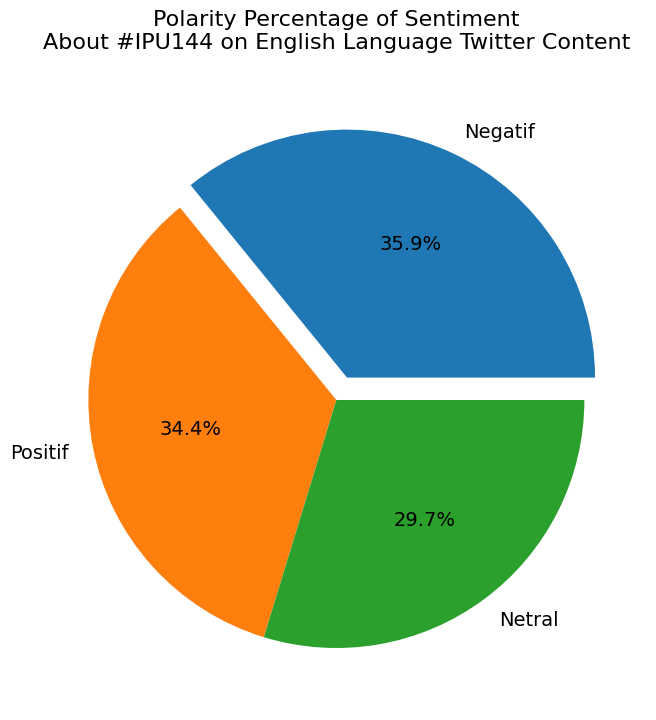

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize = (8, 10))
sizes = [count for count in tweet_df['Sentiments'].value_counts()]
labels = list(tweet_df['Sentiments'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Polarity Percentage of Sentiment\nAbout #IPU144 on English Language Twitter Content', fontsize = 16, pad = 30)
fig.set_facecolor('white')
plt.show()
plt.savefig('pie_chart.png')

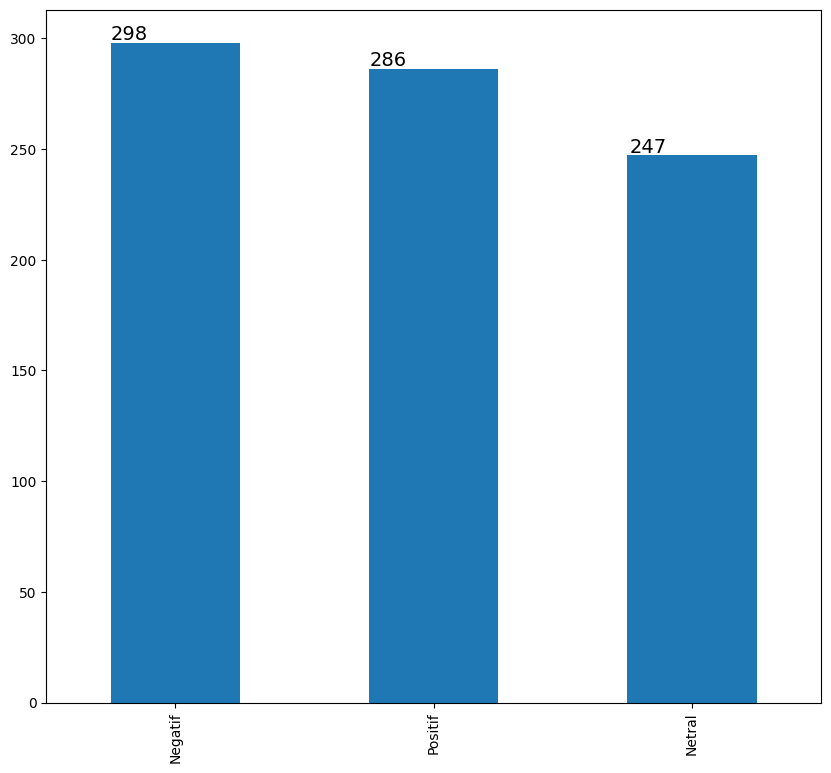

<Figure size 640x480 with 0 Axes>

In [55]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar(figsize = (10, 9))
plt.rcParams['axes.facecolor'] = 'white'
for p in ax.patches:
   ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
plt.show()
plt.savefig('bar_chart.png')

In [56]:
negative_sentiment = (tweet_df['Sentiments'] == 'Negatif').sum()
print("The number of negative sentiments is:\t", negative_sentiment)
positive_sentiment = (tweet_df['Sentiments'] == 'Positif').sum()
print("The number of positive sentiments is:\t", positive_sentiment)
neutral_sentiment = (tweet_df['Sentiments'] == 'Netral').sum()
print("The number of neutral sentiments is:\t", neutral_sentiment)
total = len(tweet_df.index)
print("The overall total of sentiments is:\t", total)

The number of negative sentiments is:	 298
The number of positive sentiments is:	 286
The number of neutral sentiments is:	 247
The overall total of sentiments is:	 831


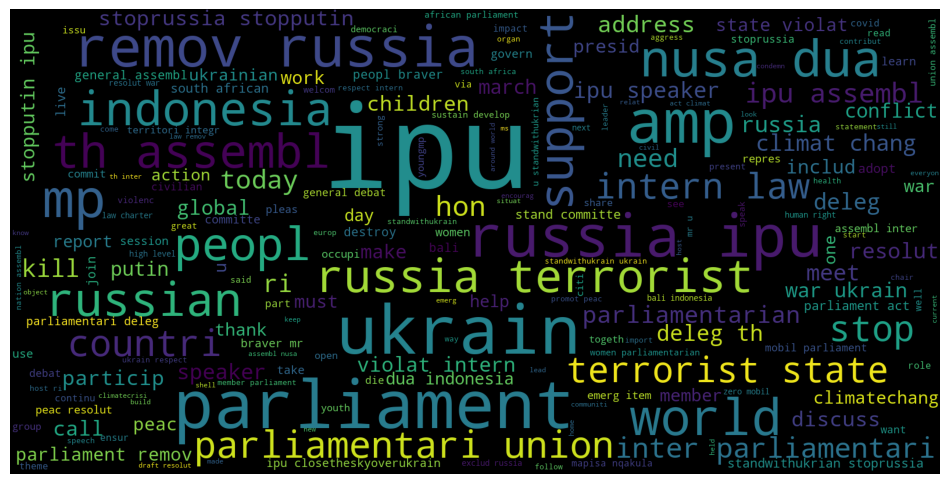

<Figure size 640x480 with 0 Axes>

In [57]:
from wordcloud import WordCloud
text = " ".join(tweet for tweet in tweet_df['Tweet'])
word_cloud = WordCloud(width=1600, height=800, max_font_size=200,
                       background_color='black').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')